In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
f_birth=pd.read_csv("/content/daily-total-female-births-in-cal.csv",index_col=[0],parse_dates=[0])

In [4]:
# squeeze=True for series conversion

In [5]:
f_birth.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [6]:
f_birth=f_birth[:365]

In [7]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<Axes: xlabel='Date'>

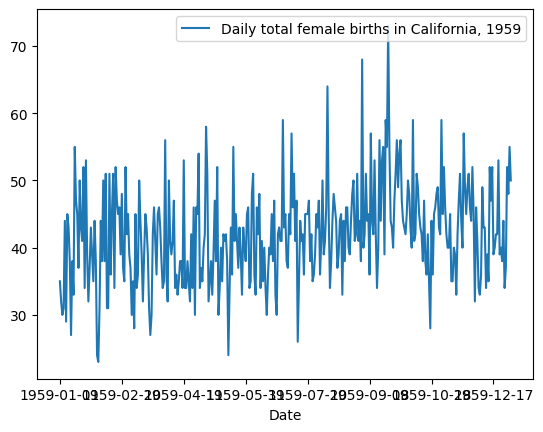

In [8]:
f_birth.plot()

In [9]:
# smoothing

In [10]:
f_birth_mean=f_birth.rolling(window=20).mean()

<Axes: xlabel='Date'>

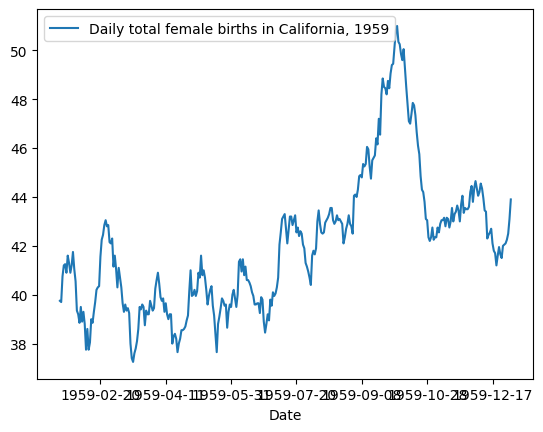

In [11]:
f_birth_mean.plot()

In [12]:
# baseline,
# arima

In [13]:
series_values=f_birth.values

In [15]:
value=pd.DataFrame(series_values)

In [18]:
birth_df = pd.concat([value,value.shift(1)],axis=1)

In [19]:
birth_df.columns =['Actual_birth','Forecast_birth']

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [32]:
birth_test=birth_df[1:364]

In [33]:
birth_error=mean_squared_error(birth_test.Actual_birth,birth_test.Forecast_birth)

In [34]:
birth_error

84.38567493112947

In [35]:
np.sqrt(birth_error)

9.186167586710438

In [23]:
# ARIMA - Autoregressive Integrated Moving Average(q)

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [37]:
# plot acf is to identify parameter Q

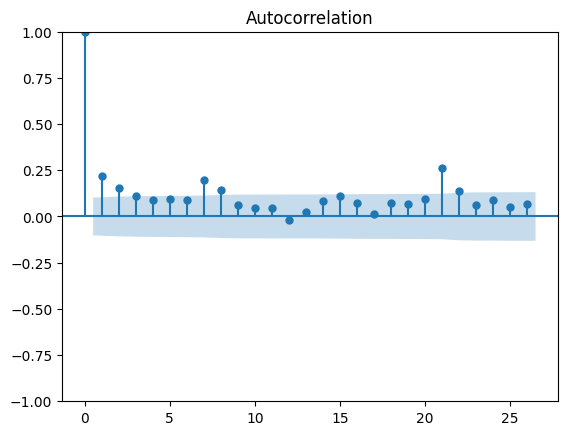

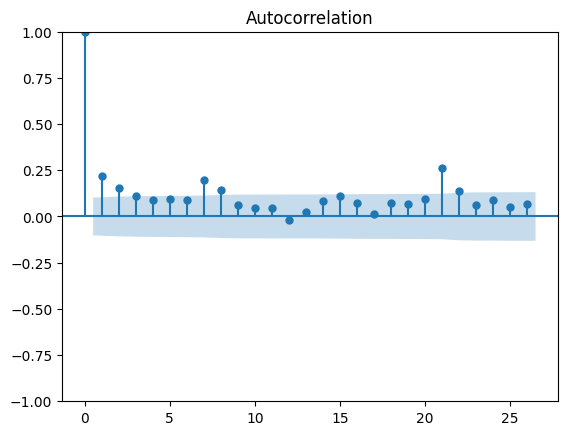

In [38]:
plot_acf(f_birth)

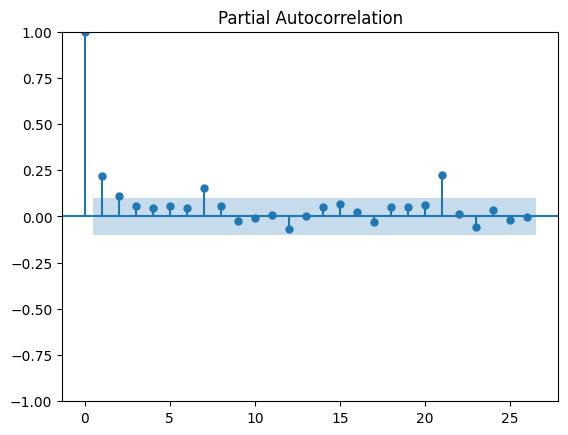

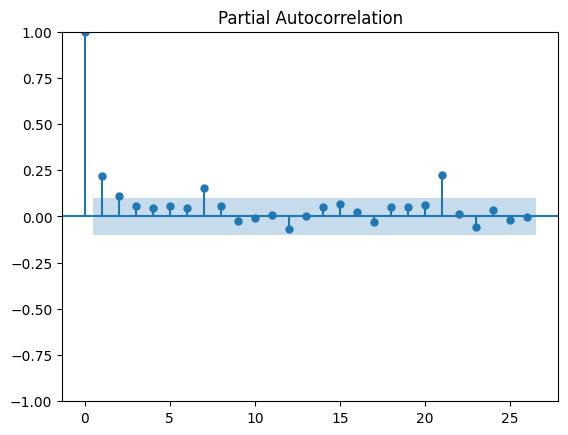

In [39]:
plot_pacf(f_birth)

In [40]:
# p=2,3 d=1 & q=3,4

In [75]:
birth_train=f_birth[0:330]
birth_test=f_birth[330:365]

In [76]:
from statsmodels.tsa.arima_model import ARIMA


In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(birth_train, order=(3, 1, 3), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
forecast = sarima_model_fit.forecast(steps=35)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [78]:
birth_error=mean_squared_error(birth_test,forecast)

In [79]:
np.sqrt(birth_error)

6.877680771708788

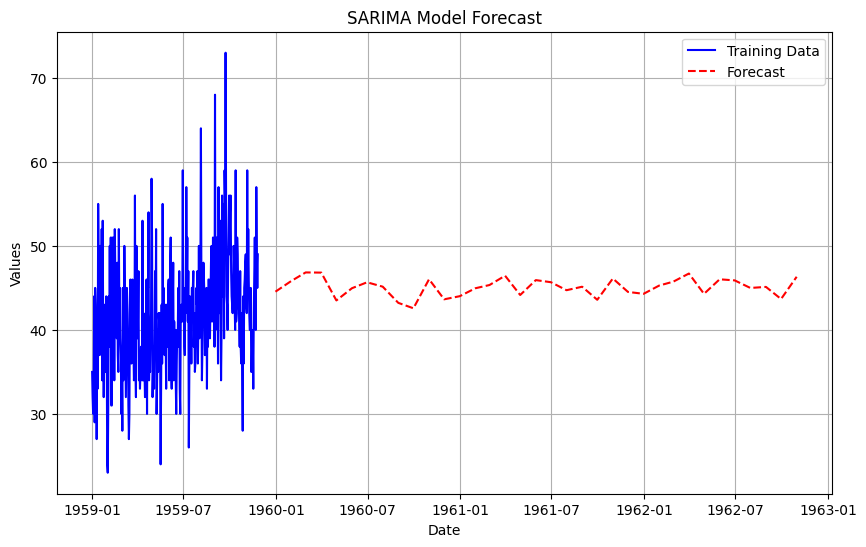

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure birth_train index is a DatetimeIndex
if not isinstance(birth_train.index, pd.DatetimeIndex):
    birth_train.index = pd.to_datetime(birth_train.index)

# Plot training data
plt.figure(figsize=(10, 6))
plt.plot(birth_train.index, birth_train.values, label='Training Data', color='blue')

# Create a forecast index with the correct frequency
forecast_index = pd.date_range(start=birth_train.index[-1], periods=len(forecast) + 1, freq='ME')[1:]

# Plot the forecasted values
plt.plot(forecast_index, forecast, label='Forecast', color='red', linestyle='--')

# Add labels, title, and legend
plt.title("SARIMA Model Forecast")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()

# Show the plot
plt.grid()
plt.show()


<ipython-input-81-e223cf5f0566>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=birth_train.index[-1] + pd.DateOffset(months=1),


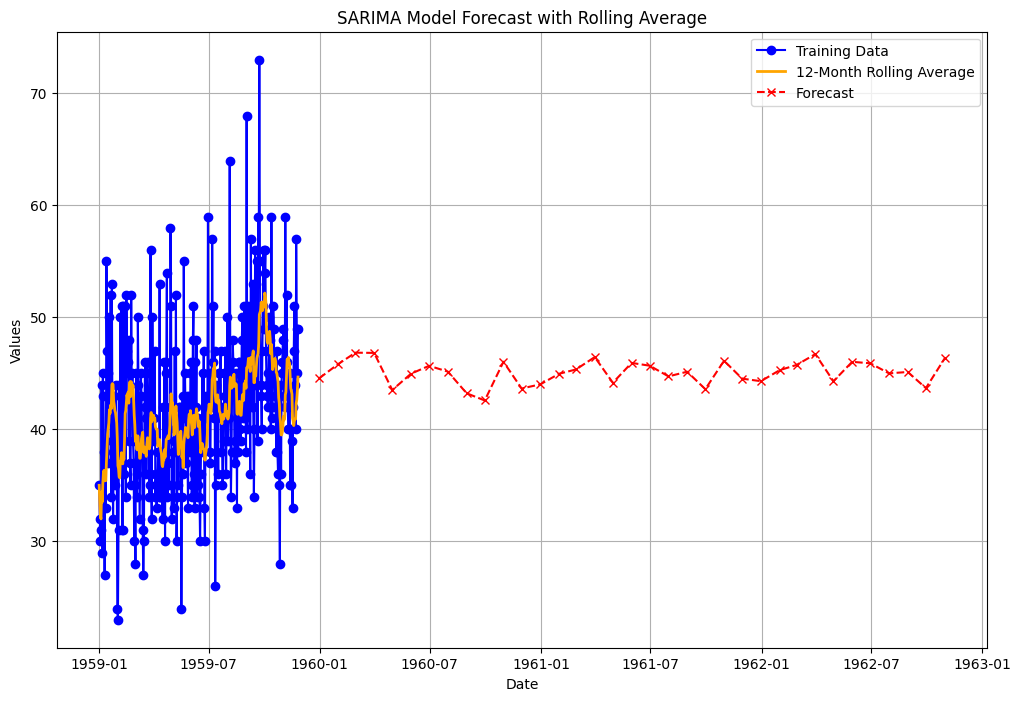

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure birth_train index is a DatetimeIndex
if not isinstance(birth_train.index, pd.DatetimeIndex):
    birth_train.index = pd.to_datetime(birth_train.index)

# Calculate rolling average with a window of your choice (e.g., 12 months)
window_size = 12  # Adjust as needed
rolling_avg = birth_train.rolling(window=window_size, min_periods=1).mean()

# Create a forecast index with the correct frequency
forecast_index = pd.date_range(start=birth_train.index[-1] + pd.DateOffset(months=1),
                               periods=len(forecast), freq='M')

# Plot the training data, rolling average, and forecasted values
plt.figure(figsize=(12, 8))

# Training data
plt.plot(birth_train.index, birth_train.values, label='Training Data', color='blue', marker='o')

# Rolling average
plt.plot(birth_train.index, rolling_avg, label=f'{window_size}-Month Rolling Average',
         color='orange', linestyle='-', linewidth=2)

# Forecasted values
plt.plot(forecast_index, forecast, label='Forecast', color='red', linestyle='--', marker='x')

# Add labels, title, and legend
plt.title("SARIMA Model Forecast with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [ ]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Define the model
# model = Sequential([
#     LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),  # Timesteps = columns in X_train
#     Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Reshape the input to 3D (samples, timesteps, features)
# X_train = np.expand_dims(X_train.values, axis=-1)
# X_test = np.expand_dims(X_test.values, axis=-1)

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=32)

# # Make predictions
# forecast = model.predict(X_test)


In [ ]:
# model = Sequential([
#     LSTM(50, activation='relu'),
#     Dense(1)
# ])
# X_train=birth_train.iloc[:,:-1]
# y_train=birth_train.iloc[:,-1]
# X_test=birth_test.iloc[:,:-1]
# y_test=birth_test.iloc[:,-1]
# model.compile(optimizer='adam', loss='mse')
# model.fit(X_train, y_train, epochs=50, batch_size=32)
# forecast = model.predict(X_test)